In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import Pitch,Sbopen,VerticalPitch
import seaborn as sns

In [3]:
#Loading all the Football Competition Dataset
parser=Sbopen()
competitions=parser.competition()
competitions.head(10)

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,9,27,Germany,1. Bundesliga,male,False,False,2015/2016,2023-12-12T07:43:33.436182,None,None,2023-12-12T07:43:33.436182
1,1267,107,Africa,African Cup of Nations,male,False,True,2023,2024-02-14T05:41:27.566989,None,None,2024-02-14T05:41:27.566989
2,16,4,Europe,Champions League,male,False,False,2018/2019,2023-03-07T12:20:48.118250,2021-06-13T16:17:31.694,None,2023-03-07T12:20:48.118250
3,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
4,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
5,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
6,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
7,16,25,Europe,Champions League,male,False,False,2013/2014,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
8,16,24,Europe,Champions League,male,False,False,2012/2013,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-07-10T13:41:45.751
9,16,23,Europe,Champions League,male,False,False,2011/2012,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [4]:
#Information about the columns of the dataset 'competitions'
competitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             71 non-null     int64 
 1   season_id                  71 non-null     int64 
 2   country_name               71 non-null     object
 3   competition_name           71 non-null     object
 4   competition_gender         71 non-null     object
 5   competition_youth          71 non-null     bool  
 6   competition_international  71 non-null     bool  
 7   season_name                71 non-null     object
 8   match_updated              71 non-null     object
 9   match_updated_360          54 non-null     object
 10  match_available_360        8 non-null      object
 11  match_available            71 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 5.8+ KB


In [5]:
#Refining the 'FIFA World Cup 2022' dataset from the 'competitions' dataset
mask=competitions['competition_name'] == 'FIFA World Cup'
print(competitions[mask])

    competition_id  season_id   country_name competition_name  \
27              43        106  International   FIFA World Cup   
28              43          3  International   FIFA World Cup   
29              43         55  International   FIFA World Cup   
30              43         54  International   FIFA World Cup   
31              43         51  International   FIFA World Cup   
32              43        272  International   FIFA World Cup   
33              43        270  International   FIFA World Cup   
34              43        269  International   FIFA World Cup   

   competition_gender  competition_youth  competition_international  \
27               male              False                       True   
28               male              False                       True   
29               male              False                       True   
30               male              False                       True   
31               male              False                   

In [6]:
FWC=parser.match(competition_id=43,season_id=106)


In [7]:
print(FWC)

    match_id match_date            kick_off  home_score  away_score  \
0    3857256 2022-12-02 2022-12-02 21:00:00           2           3   
1    3869151 2022-12-03 2022-12-03 21:00:00           2           1   
2    3857257 2022-11-30 2022-11-30 17:00:00           1           0   
3    3857258 2022-11-24 2022-11-24 21:00:00           2           0   
4    3857288 2022-11-26 2022-11-26 12:00:00           0           1   
..       ...        ...                 ...         ...         ...   
59   3857265 2022-11-22 2022-11-22 18:00:00           0           0   
60   3857262 2022-12-02 2022-12-02 17:00:00           2           1   
61   3857261 2022-11-29 2022-11-29 21:00:00           0           3   
62   3857255 2022-12-01 2022-12-01 21:00:00           2           1   
63   3857254 2022-11-22 2022-11-22 15:00:00           0           0   

   match_status match_status_360               last_updated  \
0     available        available 2023-02-17 23:45:15.306706   
1     available      

In [8]:
df, related, freeze, tactics = parser.event(3857270)

In [9]:
print(df)

                                        id  index  period        timestamp  \
0     3014564a-9c45-4928-9855-cb78b677a01a      1       1         00:00:00   
1     5650a268-bced-4440-a44e-2f79c5fa991a      2       1         00:00:00   
2     3b3e8a73-2ec0-4608-85c5-241899ee173a      3       1         00:00:00   
3     2dfcdd53-4ce2-4321-a46f-eb05f353ac8a      4       1         00:00:00   
4     3171b4d1-9bf1-4407-9f80-063ed3fa429e      5       1  00:00:00.664000   
...                                    ...    ...     ...              ...   
3436  5f6b1611-99fb-4644-b696-a8dc21a1de0a   3437       2  00:54:53.510000   
3437  36f4a29f-bae7-4cf2-8d15-c6f597424903   3438       2  00:54:59.755000   
3438  764f12f3-836c-4294-8983-ab5a5b3da83d   3439       2  00:55:03.504000   
3439  dab9d16d-6c6f-46a6-a331-36dbf49220ef   3440       2  00:55:08.300000   
3440  5ee00142-4b67-4b80-adbf-3487bc679b15   3441       2  00:55:08.300000   

      minute  second  possession  duration  match_id  type_id  

In [10]:
#Refining Portugal matches from the 'FWC' dataset
mask_Portugal_FC= ((FWC['away_team_name'] == 'Portugal')| (FWC['home_team_name'] == 'Portugal'))
Portugal_df = FWC[mask_Portugal_FC]

In [11]:
#Creating a separate DataFrame for matches in which Portugal Won, Lost or Drawn
Portugal_df_win = pd.DataFrame()
Portugal_df_lose = pd.DataFrame()
Portugal_df_draw = pd.DataFrame()
for i,j in Portugal_df.iterrows():
    
    if j.iloc[16]=='Portugal':
        if j.iloc[3]>j.iloc[4]:
            Portugal_df_win= Portugal_df_win.append(j.to_dict(),ignore_index=True)
        elif j.iloc[3]<j.iloc[4]:
            Portugal_df_lose= Portugal_df_lose.append(j.to_dict(),ignore_index=True)
        else:
            Portugal_df_draw= Portugal_df_draw.append(j.to_dict(),ignore_index=True)    
    else:
        if j.iloc[4]>j.iloc[3]:
            Portugal_df_win= Portugal_df_win.append(j.to_dict(),ignore_index=True)
        elif j.iloc[4]<j.iloc[3]:
            Portugal_df_lose= Portugal_df_lose.append(j.to_dict(),ignore_index=True)
        else:
            Portugal_df_draw= Portugal_df_draw.append(j.to_dict(),ignore_index=True)

#Modifying the datatype of attribute 'match_id' in each of the above DataFrame
Portugal_df_win["match_id"]=Portugal_df_win["match_id"].astype(int)
Portugal_df_lose["match_id"]=Portugal_df_lose["match_id"].astype(int)
#Portugal_df_draw["match_id"]=Portugal_df_draw["match_id"].astype(int)  


<ipython-input-11-3740549e18aa>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Portugal_df_lose= Portugal_df_lose.append(j.to_dict(),ignore_index=True)
<ipython-input-11-3740549e18aa>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Portugal_df_win= Portugal_df_win.append(j.to_dict(),ignore_index=True)
<ipython-input-11-3740549e18aa>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Portugal_df_win= Portugal_df_win.append(j.to_dict(),ignore_index=True)
<ipython-input-11-3740549e18aa>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Portugal_df_win= Portugal_df_win.append(j.to_dict(),ignore_index=True)
<ipython-input-11-3740549e18aa>:1

In [12]:
#printing the players of Portugal team
player_names = df[df['team_name'] == 'Portugal']['player_name'].dropna().unique()
print("Players of Team Portugal:")
for idx, player_name in enumerate(player_names, start=1):
    print(f"{idx}. {player_name}")

Players of Team Portugal:
1. Bruno Miguel Borges Fernandes
2. João Félix Sequeira
3. Cristiano Ronaldo dos Santos Aveiro
4. William Silva de Carvalho
5. Nuno Mendes
6. Rúben Santos Gato Alves Dias
7. Diogo Meireles Costa
8. Kléper Laveran Lima Ferreira
9. Bernardo Mota Veiga de Carvalho e Silva
10. João Pedro Cavaco Cancelo
11. Rúben Diogo Da Silva Neves
12. Raphaël Adelino José Guerreiro
13. Rafael Alexandre Conceição Leão
14. João Maria Lobo Alves Palhinha Gonçalves
15. Gonçalo Matias Ramos
16. Matheus Luiz Nunes


In [13]:
#printing the opponents who played with Portugal
opponents= pd.DataFrame(Portugal_df)
print(Portugal_df['away_team_name'])

8        Portugal
16    Switzerland
28        Uruguay
39          Ghana
60       Portugal
Name: away_team_name, dtype: object


3869486


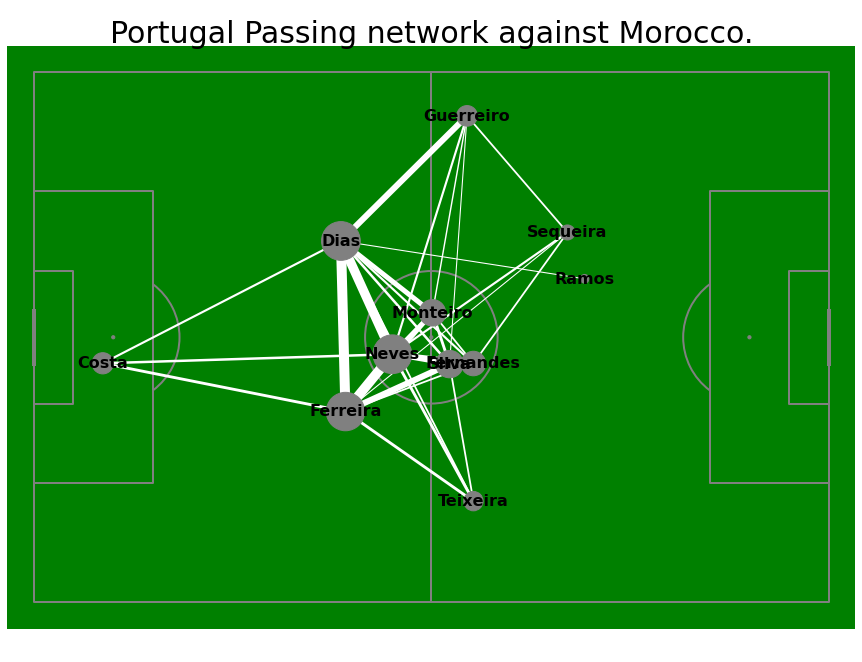

3869254


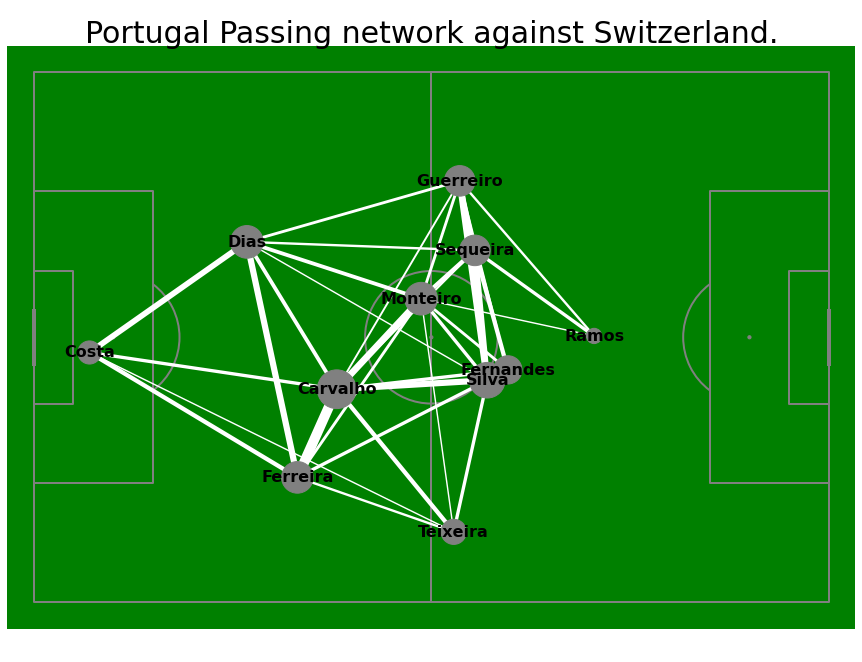

3857270


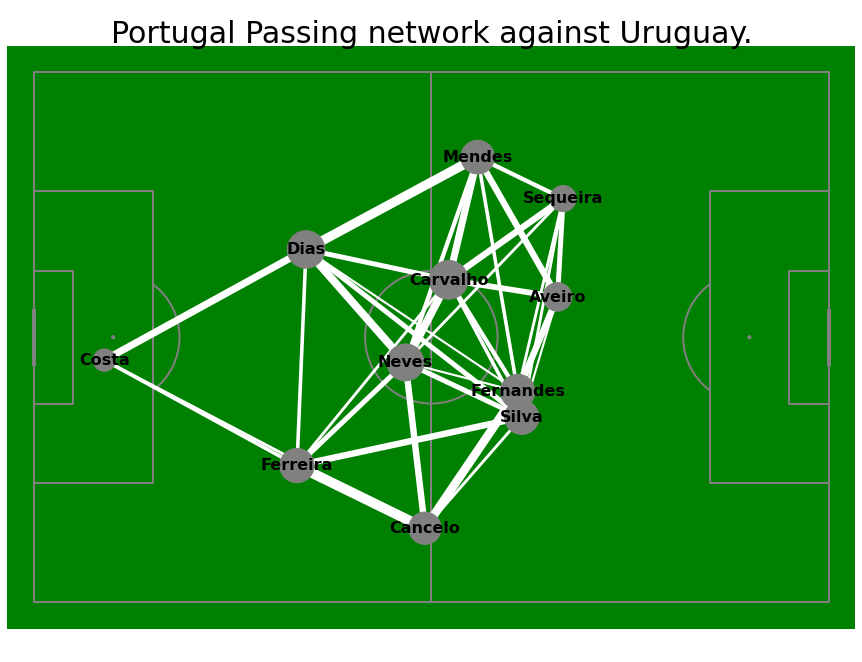

3857298


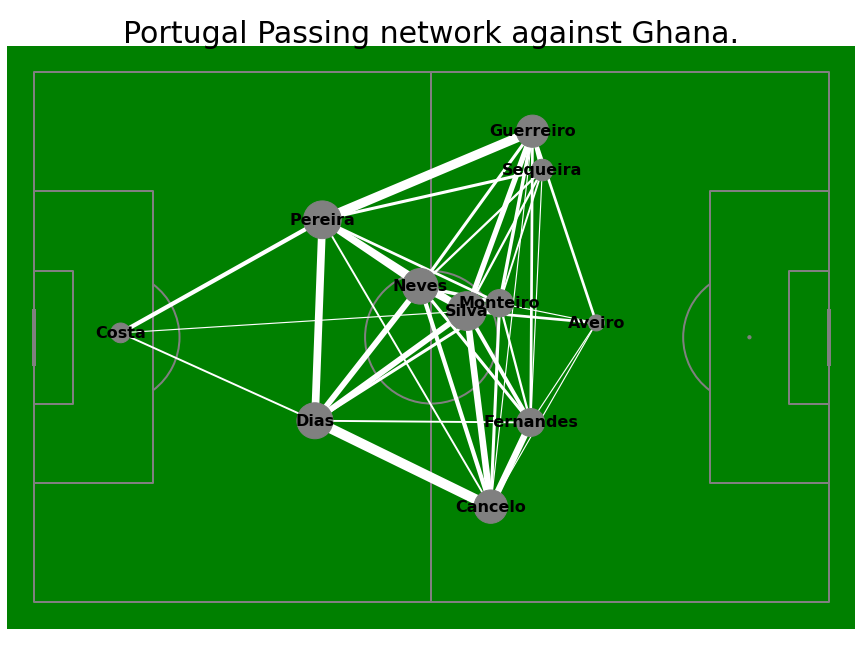

3857262


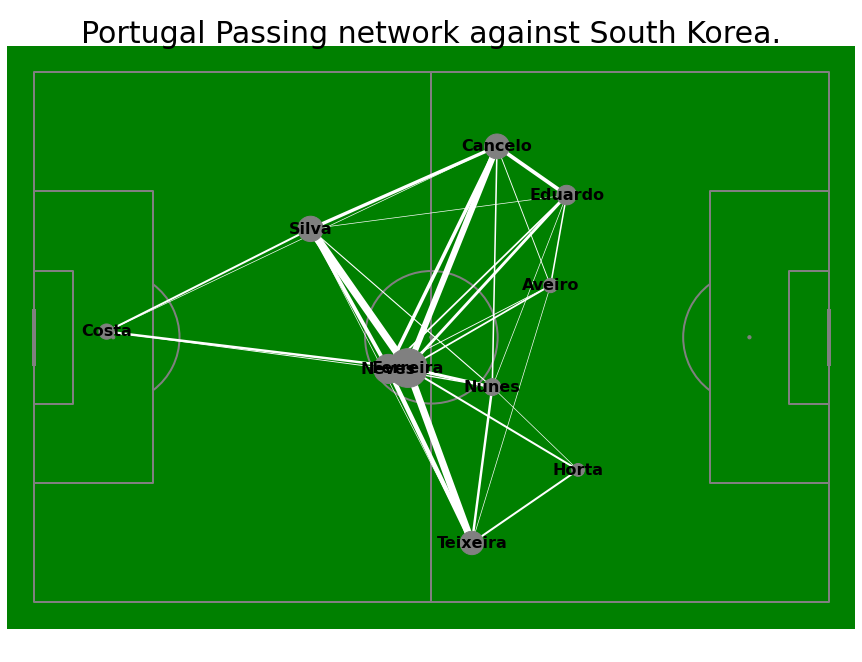

In [30]:
for i,j in  Portugal_df.iterrows():
        
        
        print(j.iloc[0])
        if j.iloc[16]=='Portugal':
            opposition=j.iloc[28]
        else:
            opposition=j.iloc[16]    
        df, related, freeze, tactics = parser.event(j.iloc[0])
        # print(df.head(10))
        
        #Preparation of the Data
        #check for index of first sub
        
        sub = df.loc[df["type_name"] == "Substitution"].loc[df["team_name"] == "Portugal"].iloc[0]["index"]
        #make df with successfull passes by England until the first substitution
        mask_england = (df.type_name == 'Pass') & (df.team_name == "Portugal") & (df.index < sub) & (df.outcome_name.isnull()) & (df.sub_type_name != "Throw-in")
        #taking necessary columns
        df_pass = df.loc[mask_england, ['x', 'y', 'end_x', 'end_y', "player_name", "pass_recipient_name"]]
        #adjusting that only the surname of a player is presented.
        df_pass["player_name"] = df_pass["player_name"].apply(lambda x: str(x).split()[-1])
        df_pass["pass_recipient_name"] = df_pass["pass_recipient_name"].apply(lambda x: str(x).split()[-1])

        #Calculating vertices size and location

        scatter_df = pd.DataFrame()
        for i, name in enumerate(df_pass["player_name"].unique()):
            passx = df_pass.loc[df_pass["player_name"] == name]["x"].to_numpy()
            recx = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_x"].to_numpy()
            passy = df_pass.loc[df_pass["player_name"] == name]["y"].to_numpy()
            recy = df_pass.loc[df_pass["pass_recipient_name"] == name]["end_y"].to_numpy()
            scatter_df.at[i, "player_name"] = name
            #make sure that x and y location for each circle representing the player is the average of passes and receptions
            scatter_df.at[i, "x"] = np.mean(np.concatenate([passx, recx]))
            scatter_df.at[i, "y"] = np.mean(np.concatenate([passy, recy]))
            #calculate number of passes
            scatter_df.at[i, "no"] = df_pass.loc[df_pass["player_name"] == name].count().iloc[0]

        #adjust the size of a circle so that the player who made more passes 
        scatter_df['marker_size'] = (scatter_df['no'] / scatter_df['no'].max() * 1500)

        #Calculating edge width

        #counting passes between players
        df_pass["pair_key"] = df_pass.apply(lambda x: "_".join(sorted([x["player_name"], x["pass_recipient_name"]])), axis=1)
        lines_df = df_pass.groupby(["pair_key"]).x.count().reset_index()
        lines_df.rename({'x':'pass_count'}, axis='columns', inplace=True)
        #setting a treshold. You can try to investigate how it changes when you change it.
        lines_df = lines_df[lines_df['pass_count']>2]
 
        #Plotting edges and nodes
        
        pitch = Pitch(pitch_color='green',line_color='grey')
        fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                            endnote_height=0.04, title_space=0, endnote_space=0)
        pitch.scatter(scatter_df.x, scatter_df.y, s=scatter_df.marker_size, color='grey', edgecolors='grey', linewidth=1, alpha=1, ax=ax["pitch"], zorder = 3)
        for i, row in scatter_df.iterrows():
            pitch.annotate(row.player_name, xy=(row.x, row.y), c='black', va='center', ha='center', weight = "bold", size=16, ax=ax["pitch"], zorder = 4)
            
        for i, row in lines_df.iterrows():
                player1 = row["pair_key"].split("_")[0]
                player2 = row['pair_key'].split("_")[1]
                #take the average location of players to plot a line between them 
                player1_x = scatter_df.loc[scatter_df["player_name"] == player1]['x'].iloc[0]
                player1_y = scatter_df.loc[scatter_df["player_name"] == player1]['y'].iloc[0]
                player2_x = scatter_df.loc[scatter_df["player_name"] == player2]['x'].iloc[0]
                player2_y = scatter_df.loc[scatter_df["player_name"] == player2]['y'].iloc[0]
                num_passes = row["pass_count"]
                #adjust the line width so that the more passes, the wider the line
                line_width = (num_passes / lines_df['pass_count'].max() * 10)
                #plot lines on the pitch
                pitch.lines(player1_x, player1_y, player2_x, player2_y,
                                alpha=1, lw=line_width, zorder=2, color="white", ax = ax["pitch"])

        fig.suptitle(f"Portugal Passing network against {opposition}.", fontsize = 30)
        plt.show() 

In [16]:
#from network import iterate
#iterate(Portugal_df_win)

In [17]:
Portugal_df_lose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         2 non-null      int32         
 1   match_date                       2 non-null      datetime64[ns]
 2   kick_off                         2 non-null      datetime64[ns]
 3   home_score                       2 non-null      int64         
 4   away_score                       2 non-null      int64         
 5   match_status                     2 non-null      object        
 6   match_status_360                 2 non-null      object        
 7   last_updated                     2 non-null      datetime64[ns]
 8   last_updated_360                 2 non-null      datetime64[ns]
 9   match_week                       2 non-null      int64         
 10  competition_id                   2 non-null      int64         
 1

In [18]:
print(Portugal_df['referee_name'])

8            Facundo Tello Figueroa
16    César Arturo Ramos Palazuelos
28                  Alireza Faghani
39                    Ismail Elfath
60           Facundo Tello Figueroa
Name: referee_name, dtype: object


3869486


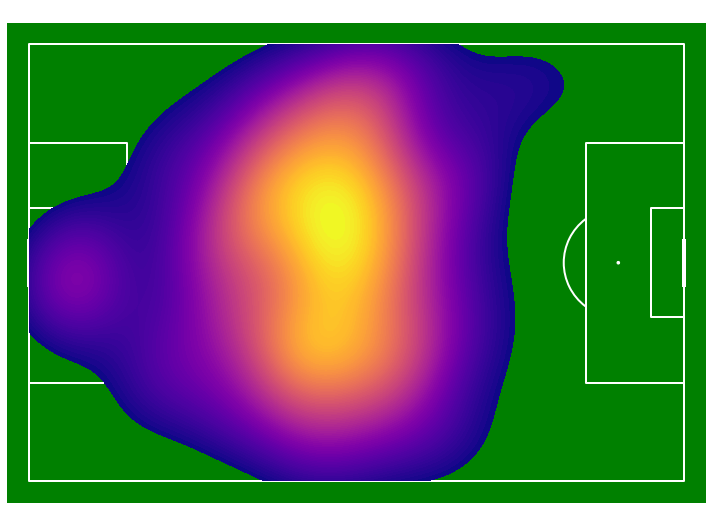

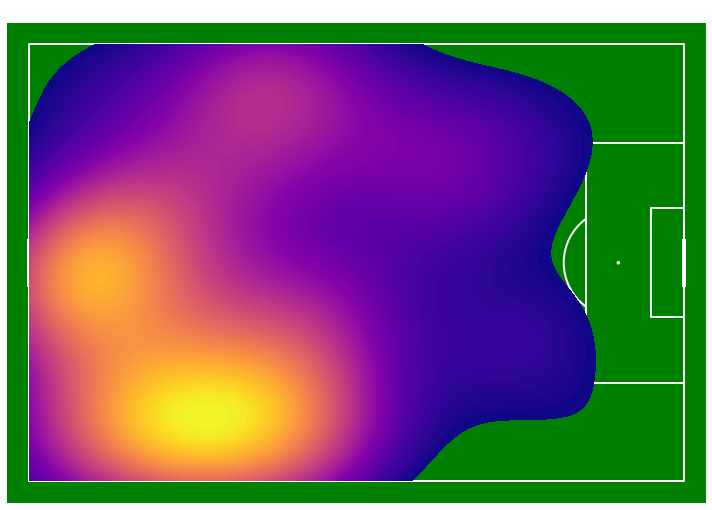

3869254


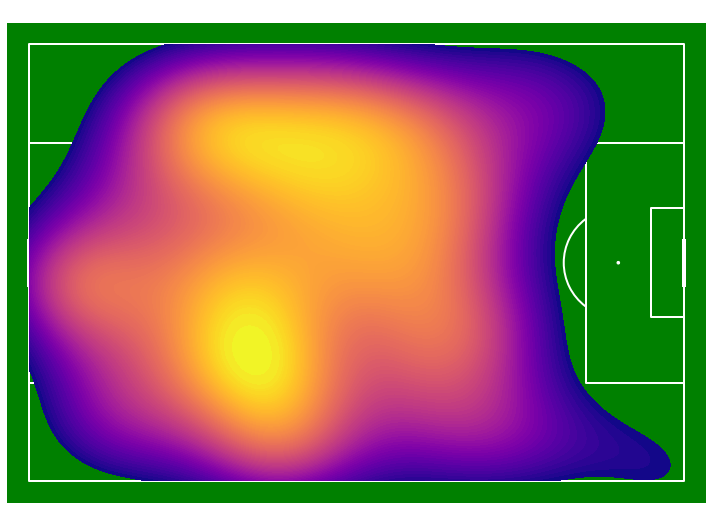

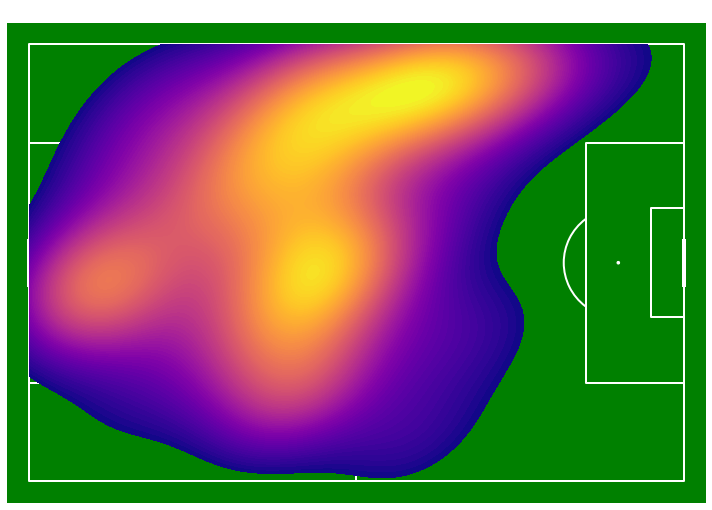

3857270


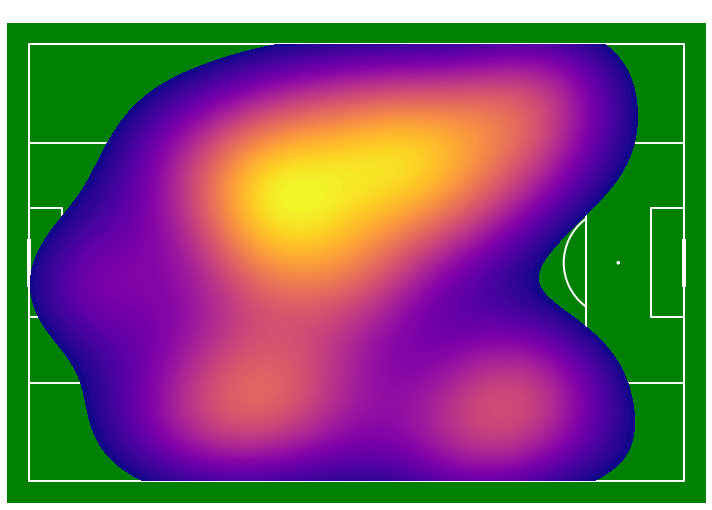

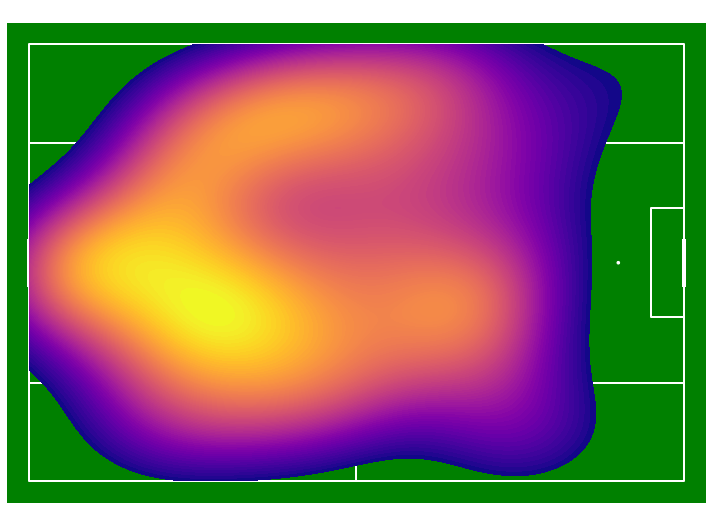

3857298


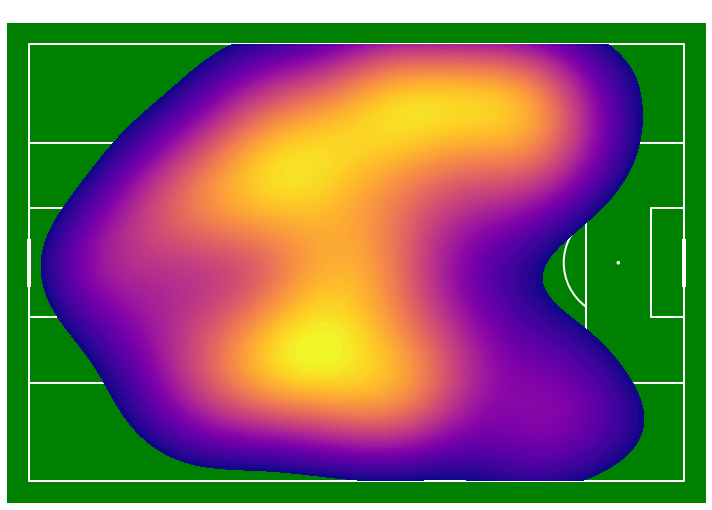

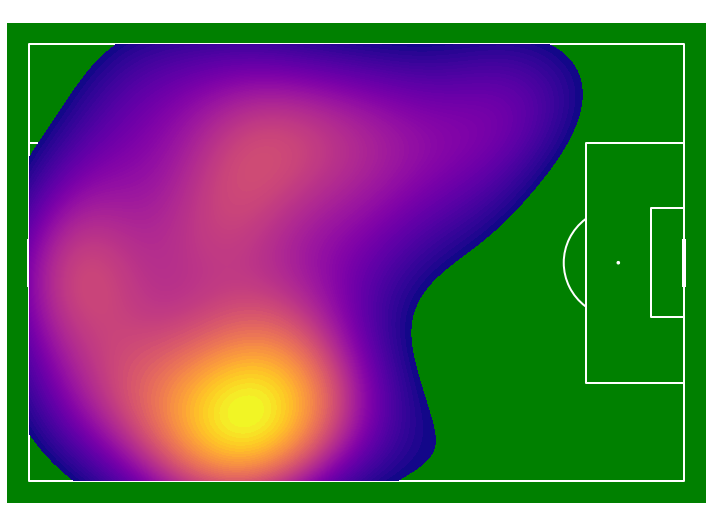

3857262


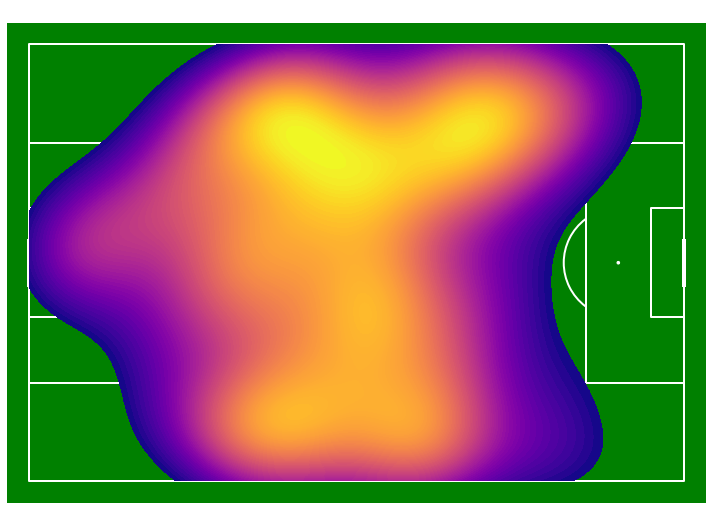

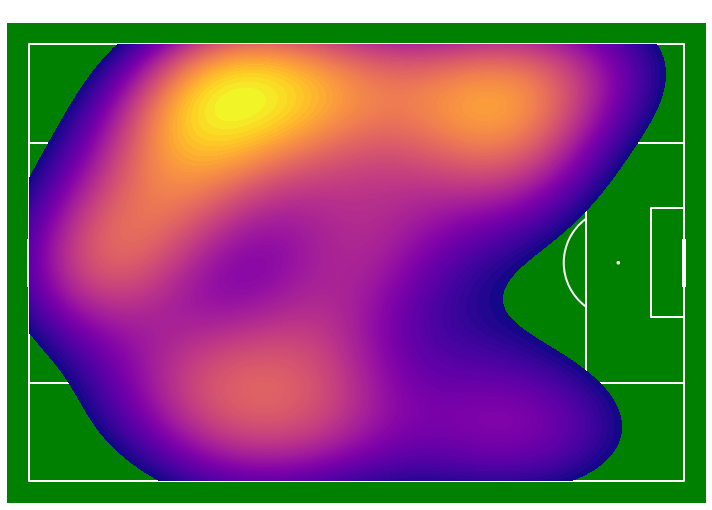

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mplsoccer import Pitch

# Assuming Portugal_df and parser are defined as per your original code

for i, j in Portugal_df.iterrows():
    print(j.iloc[0])
    if j.iloc[16] == 'Portugal':
        opposition = j.iloc[28]
    else:
        opposition = j.iloc[16]
        
    df, related, freeze, tactics = parser.event(j.iloc[0])

    # Function to prepare data and plot for each team
    def prepare_and_plot_team_pass_network(team_name, opposition_name, df):
        # Filter for successful passes before the first substitution for the team
        first_sub = df.loc[(df["type_name"] == "Substitution") & (df["team_name"] == team_name), "index"].min()
        mask_team = (df["type_name"] == "Pass") & (df["team_name"] == team_name) & (df["index"] < first_sub) & (df["outcome_name"].isnull()) & (df["sub_type_name"] != "Throw-in")
        df_pass = df.loc[mask_team, ['x', 'y', 'end_x', 'end_y']]
        
        # Generate heat map for the team
        pitch = Pitch(pitch_color='green', line_color='white')
        fig, ax = pitch.draw(figsize=(10, 8))
        kdeplot = pitch.kdeplot(df_pass['x'], df_pass['y'], ax=ax, fill=True, levels=100, cmap='plasma')
        plt.title(f"{team_name} Passing Heatmap against {opposition_name}", color='white')
        plt.show()
        

    # Prepare data and plot for Portugal
    prepare_and_plot_team_pass_network("Portugal", opposition, df)

    # Prepare data and plot for the opposition team
    prepare_and_plot_team_pass_network(opposition, "Portugal", df)
